In [1]:
!pip install scipy
!pip install sklearn
!pip install textx
!pip install matplotlib

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
from IPython.display import Audio
from scipy.misc import face
from scipy.io import wavfile
from scipy import signal
from os.path import getsize
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from util import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Instructions 
This is an iPython notebook. iPython makes it easy to run small snippets in
  Python code to see what happens! Here are some useful commands to use:
   
  1. Click on a cell (will have a green outline around it) and press
      SHIFT+ENTER to run the code in the cell. Make sure you run the top cell
      first, because it contains important import statements!
      
  2. You can also run a cell, or all the cells, using the 'Cell' menu up top.
  
  3. Save your work with CTRL+S, or in the File menu.
  
  If you have any questions, just ask!

# 1 - Images

## 1.1 Images as matrices of numbers

For the following section, create some pixel art in greyscale. That means
using numbers from 0-1, 0 being totally black and 1 being totally white.

Don't spend tooooo much time on this, but make sure your picture has some
different shades of grey. Press SHIFT+ENTER while hovering on this cell to
update your changes.

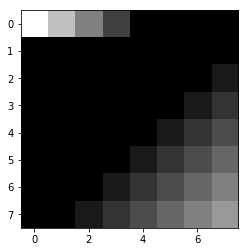

In [3]:
# Feel free to modify the numbers below to change the colors
my_image = np.array(
    [
        [1, 0.75, 0.5, 0.25, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3],
        [0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4],
        [0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        [0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    ],
    dtype=np.float
)
im_show_gray(my_image)

## 1.2 Image Masking

What if I wanted to make put a watermark or a YouTube annotation on the image? I have to overlay my image on top of your image. Let's say that my annotation, which is 9 pixels, looks like this:

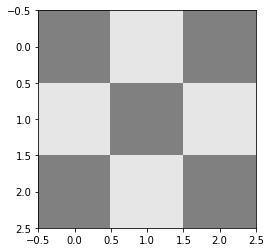

In [4]:
annotation = np.array([[0.5, 0.9, 0.5],
                       [0.9, 0.5, 0.9],
                       [0.5, 0.9, 0.5]],
                     dtype=float)
im_show_gray(annotation)

Overlaying the images takes a couple steps:

1. Create an image that is totally blank except for my annotation, exactly where I want it. 
2. Create a mask with 1s and 0s that correspond to the part of the image that takes up the annotation. Multiplying this mask with the image will remove that part of the original image (an AND operation).
3. "Add" the two images together (OR operation). The final result will have your image with my annotation in the corner!

#### Step 1: Create annotation image



Here is an image with all zeros except for my annotation:



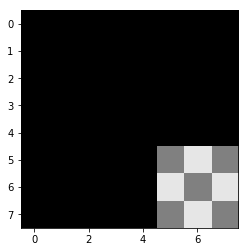

In [5]:
print("\n\nHere is an image with all zeros except for my annotation:\n")

annotation_in_corner = np.array(
    [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.9, 0.5],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.5, 0.9],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.9, 0.5],
    ],
    dtype=np.float
)
im_show_gray(annotation_in_corner)

#### Step 2: Create Bitmask and multiply (AND) by the original image


This bitmask will keep all of the pixels of your image except for the bottom 9 in the corner when I multiply it with your image. In effect, the pixel is nonzero if my pixel AND yours are nonzero.


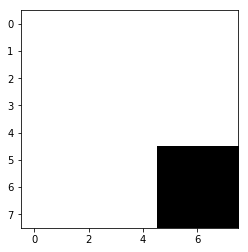

In [6]:
print("\nThis bitmask will keep all of the pixels of your image except for the bottom 9 in the corner\
 when I multiply it with your image. In effect, the pixel is nonzero if my pixel AND yours are nonzero.")

bitmask = np.array(
    [
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    ],
    dtype=np.float
)
im_show_gray(bitmask)


Now, let's multiply my bitmask and your image together! This is what the array looks like:

[[ 1.    0.75  0.5   0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.1 ]
 [ 0.    0.    0.    0.    0.    0.    0.1   0.2 ]
 [ 0.    0.    0.    0.    0.    0.1   0.2   0.3 ]
 [ 0.    0.    0.    0.    0.1   0.    0.    0.  ]
 [ 0.    0.    0.    0.1   0.2   0.    0.    0.  ]
 [ 0.    0.    0.1   0.2   0.3   0.    0.    0.  ]]


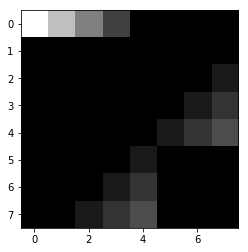

In [7]:
print("\nNow, let's multiply my bitmask and your image together! This is what the array looks like:\n")

my_image_masked = my_image * bitmask
print(my_image_masked)
im_show_gray(my_image_masked)

#### Step 3: Finally, let's create the end image!

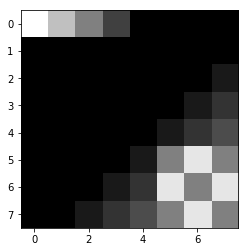

In [8]:
result = my_image_masked + annotation_in_corner

im_show_gray(result)

## 1.3 Image Transformations

Now that we have an image, we can make modifications to it by changing each pixel's value in a systematic way. 

We can brighten, darken, change the white balance, or change the color of the image with simple lines of code!

Let's apply some transformations to your image! Try to guess what each code block is doing before you run it.

#### 1.3.0 The original image

[[ 1.    0.75  0.5   0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.1 ]
 [ 0.    0.    0.    0.    0.    0.    0.1   0.2 ]
 [ 0.    0.    0.    0.    0.    0.1   0.2   0.3 ]
 [ 0.    0.    0.    0.    0.1   0.5   0.9   0.5 ]
 [ 0.    0.    0.    0.1   0.2   0.9   0.5   0.9 ]
 [ 0.    0.    0.1   0.2   0.3   0.5   0.9   0.5 ]]


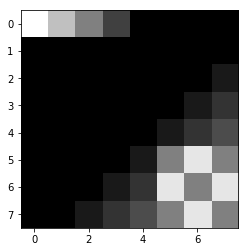

In [9]:
my_image = result
print(my_image)
im_show_gray(result)

#### 1.3.1 What would IPython show?!?!

This is the first transformation. Run the code block when you're ready.

The code for this transformation converts each pixel to either black or white, based on which one it was closer to.
[[ 1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]


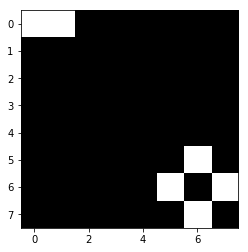

In [10]:
my_image2 = my_image.copy()

for row_index, row in enumerate(my_image2):
    for pixel_index, pixel in enumerate(row):
        my_image2[row_index][pixel_index] = 1 if pixel > .5 else 0 # this is the important part!
                                                                   # what does it do?
    
print(".ot resolc saw ti eno hcihw no desab ,etihw ro kcalb rehtie ot lexip hcae strevnoc noitamrofsnart\
 siht rof edoc ehT"[::-1])
print(my_image2)
im_show_gray(my_image2)

#### 1.3.2 What would IPython show?


Here is what the matrix looks like:

[[ 0.5   0.25  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.4 ]
 [ 0.    0.    0.    0.    0.    0.    0.4   0.  ]]


This one is a lightening filter. It takes each number and adds a constant amount to it! Try changing the my_filter variable or even making it positive. What do you think will happen?


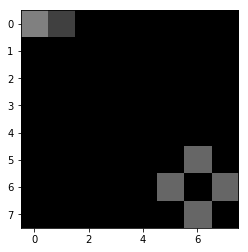

In [11]:
my_image3 = np.array(my_image, copy=True)

my_filter = -0.5

for row_index, row in enumerate(my_image3):
    for pixel_index, pixel in enumerate(row):
        my_image3[row_index][pixel_index] = min(max(pixel + my_filter, 0), 1) #money line right here

print("\nHere is what the matrix looks like:\n")
print(my_image3)
print("?neppah lliw kniht uoy od tahW .evitisop ti gnikam neve ro elbairav retlif_ym eht gnignahc\
 yrT !ti ot tnuoma tnatsnoc a sdda dna rebmun hcae sekat tI .retlif gninethgil a si eno sihT\n\n"[::-1])

im_show_gray(my_image3)

#### 1.3.3 Filtering with full-sized images

Now let's work with a real image. This image has way more pixels than your pixel art, but the
structure is exactly the same! [note: not *exactly* the same, because the numbers are now from 0-255.] 

Let's apply some of the same "filters" that we applied to your pixel art. We'll start with a greyscale version.

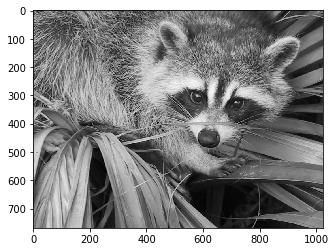

In [12]:
raccoon_gray = face(True)
im_show_gray(raccoon_gray)

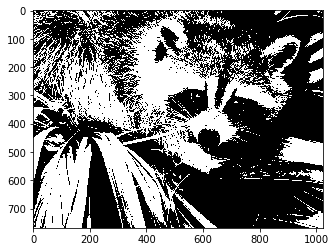

In [13]:
# Run this code to apply the black and white filter
raccoon_gray_bw = raccoon_gray.copy()
for row_index, row in enumerate(raccoon_gray_bw):
    for pixel_index, pixel in enumerate(row):
        raccoon_gray_bw[row_index][pixel_index] = 255 if pixel > 128 else 0
        
im_show_gray(raccoon_gray_bw)

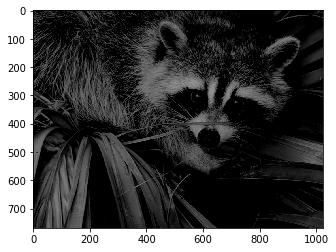

In [14]:
# Run this code to apply the darkening and lightening filter.
raccoon_gray_darken = raccoon_gray.copy()

# add a darkening (negative) or lightening (positive) amount here!
# remember that the values range from 0-255 now.
my_filter = -100

for row_index, row in enumerate(raccoon_gray):
    for pixel_index, pixel in enumerate(row):
        raccoon_gray_darken[row_index][pixel_index] = min(max(pixel + my_filter, 0), 255)   

im_show_gray(raccoon_gray_darken)

#### 1.3.4 Working with color images

For our final step, let's work with color. Now, instead of there being one number for each pixel, there are three. These are the Red, Green, and Blue (RGB) values that you've probably heard of. 

We can manipulate these values in a similar way as with greyscale, but now we have even more creative control. Let's give our raccoon a nice Instagram filter.

[[[121 112 131]
  [138 129 148]
  [153 144 165]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]]]


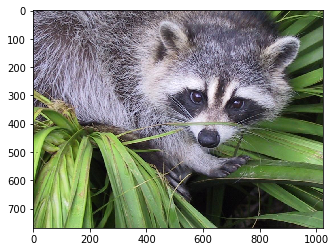

In [15]:
# First, view the original picture in all its glory!
raccoon = face()
plt.imshow(raccoon)
# Notice that each "item" of the data grid is now 3 values
# corresponding to Red, Green, and Blue values between 0 and 255
# The code below prints the top left corner, in a 3x3 region
print(raccoon[:3, :3, ...])

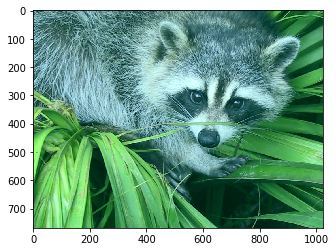

In [16]:
# Now, it's time to modify the color values. We will boost some colors by increasing their magnitude.
raccoon_filtered = raccoon.copy()

# play around with these values if you want!
red_boost = -10
green_boost = 45
blue_boost = 30
lighten = -20

# darken or lighten the image a little bit.
red_boost += lighten
green_boost += lighten
blue_boost += lighten

for row_index, row in enumerate(raccoon_filtered):
    for pixel_index, pixel in enumerate(row):
        # at this point, pixel is a length-3 array corresponding to the R, G, and B values of the pixel
        
        # change the color balance and make sure all values are between 0 and 255
        pixel[0] = min(max(pixel[0] + red_boost, 0), 255)
        pixel[1] = min(max(pixel[1] + green_boost, 0), 255)
        pixel[2] = min(max(pixel[2] + blue_boost, 0), 255)
            
plt.imshow(raccoon_filtered)

## 1.4 Image Compression by Grouping Similar Pixels

The raccoon image above takes $768 \times  1024 \times 3 = 2359296 \text{ bytes} = 2.36 \text{MB}$ (each number is uint8, which is 1 byte).

That's pretty big for one picture! To put that in perspective, a one minute long video running at 24 frames per second using the above encoding will have a size of $2.36 * 24 * 60 = 3398.4 \text{ MB} = 3.4 \text{ GB}$!

One way to compress images is by reducing the amount of unique colors in the image. 

The code below groups an image's pixels by color into n clusters, and it replaces each pixel in the image with the center of the cluster that the pixel belongs to.

In [17]:
def compress_im(im, n_clusters, samples=1000):
    '''Compresses color image by finding the top n_groups of pixels, 
    then replacing all pixels with their closest neighbor in that group.
    
    Don't worry about the specifics of this function.
    '''
    # house keeping code to massage the data formats
    if im.dtype == np.uint8:
        im = im.astype(np.float64)/255        
    shape = im.shape    
    im_X = im.reshape(shape[0]*shape[1], 3)
    im_X_to_sample = im_X.copy()
    shuffle(im_X_to_sample)
    im_X_sampled = im_X_to_sample[:samples]
    
    # using KMeans algorithm to find n clusters
    kmeans = KMeans(n_clusters=n_clusters).fit(im_X_sampled)
    
    # reconstructing compressed image with the found clusters
    centers = kmeans.cluster_centers_
    group_assignments = kmeans.predict(im_X)
    im_Y = np.take(centers, group_assignments, axis=0)
    im_compressed = im_Y.reshape(shape[0], shape[1], 3)
    return im_compressed

In [18]:
print("Original image has roughly {}".format(im_size(raccoon)))

Original image has roughly ~402315 bytes


Vary the number of clusters and see how the results change!

1. What happens when you just have 1 cluster? 2?
2. How many clusters do you need to have more than "1" dimension of color?
3. What's the minimum number of clusters so that you can't tell the difference between the original and the compressed image?

Compressed image has roughly ~30 bytes


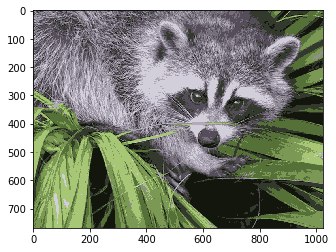

In [19]:
n_clusters = 10
compressed_raccoon = compress_im(raccoon, n_clusters)
plt.imshow(compressed_raccoon)
print("Compressed image has roughly {}".format(im_size(compressed_raccoon)))

# 2 - Audio

Like images, sounds are also just arrays of numbers that describe the "intensity" of the sound at each step. 

Sound files need to specify a "sample rate" in the unit of Hertz (1/second), which describes how frequent each "intensity" step is. 

For example a sound file with a sample rate of 10 means its numbers describe sound intensities that change every 0.1s.

Standard quality audio often has a samplte rate of 44100 = 44k. Meaning the sound intensity can very 44 thousand times in a second!

### 2.1 Sounds as numbers in time domain

Instructions:
1. Use the following code to visualize and play the "A" chord. 
2. Vary the sample rate to higher and lower numbers - can you hear the difference?
3. Change the frequencies array to a sequence of other keys (see a mapping of keys to frequencies [here](https://pages.mtu.edu/~suits/notefreqs.html))

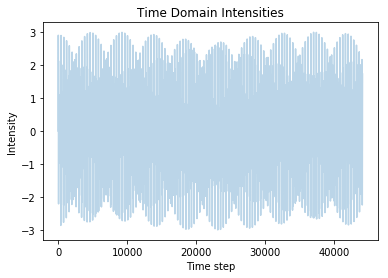

In [20]:
# Play around with these values!
frequencies = [440, 554.37, 659.25]
sample_rate = 44100

# Constructing audio
samples = np.asarray([np.sin(np.linspace(0, 2 * np.pi * frequency, sample_rate)) for frequency in frequencies])

# Displaying plot
data_rate = sample_rate
data = np.sum(samples, axis=0)
plt.plot(range(len(data)), data, alpha=0.3)
plt.title("Time Domain Intensities")
plt.ylabel("Intensity")
plt.xlabel("Time step")

Audio(np.concatenate(list(samples) + [np.sum(samples, axis=0)]), rate=sample_rate)

To visualize the frequencies of the audio above, we will convert 0.1s "chunks" of the song into the frequency domain.

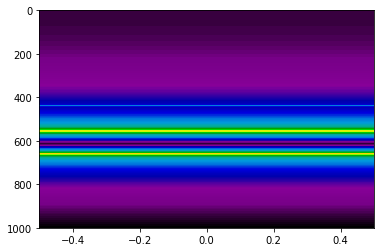

In [21]:
plt.imshow(20*np.log10(to_chunks(data, 1, sample_rate))[:1000], interpolation="none", aspect="auto", cmap='nipy_spectral')

### 2.2 Sounds as numbers in frequency domain

"Frequency" encoding is very similar to the dictionary-based encoding scheme above. Instead of each key referring to a word, each key here refers to a "chunk" of sound played at the specified frequency of that key.

1. Look at "lullaby.txt" for the frequency (keys) encoding of the lullaby.
2. Run the following code to listen to the audio file.

In [22]:
length = 256
sampling_rate = 44100*16

# Change this to change the number of beats per minute
beats_per_minute = 100

song = load_song("lullaby.txt") # change the file name to whatever you created
frequencies = song_to_frequencies(song)

# Replace the names with the part names you chose
song_parts = ["melody", "harmony", "left_hand_high", "left_hand_low"]
song_data = sum(frequencies_to_stream(frequencies[name], sampling_rate, beats_per_minute) for name in song_parts)
Audio(smooth(song_data, 256)[::int(sampling_rate/44100)], rate=44100)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Run the following code to visualize "chunks" of the lullaby in the frequency domain

What does it look like?

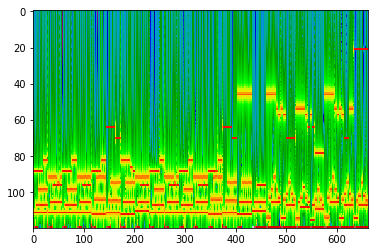

In [23]:
sheet_music = np.log10(to_chunks(song_data, 1, data_rate) + 0.001)[:120][::-1]
plt.imshow(sheet_music, interpolation="none", aspect="auto", cmap='nipy_spectral')

## Compression
Below is the compression ratio for the song. Notice that if we store the file as text (as a list of frequencies) rather than raw audio data (which is a list of bytes over time), we can reduce the size of the data.

In [24]:
print("Sheet music size:", song_data.nbytes, "bytes")
print("Audio data size:", getsize("lullaby.txt"), "bytes")
print("Total compression ratio:", song_data.nbytes / float(getsize("lullaby.txt")))

Sheet music size: 233694720 bytes
Audio data size: 1475 bytes
Total compression ratio: 158437.09830508474


Try modifying the file "lullaby.txt" with your own notes or writing your own file!

Notes are written in standard notation (i.e. Bb3) means the third B-flat. Rests are written as N.

Ab3 4 means play the third A-flat for 4 beats.

Each part must have the same number of beats.

## Edit lullaby.txt like:
[part_name_1]
notes

[part_name_2]
notes

Run the previous two sections of the notebook again, replacing "melody", "harmony" and the other names with your part names.